## CS5785 Fall 2021 Applied Machine Learning Homework 2: PROGRAMMING EXERCISE 1 - Regularized linear regression

### By Siyi Chen(sc2358)，Hao Geng (hg457)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [ ]:
desc1 = train.describe(include =['object','int','float'] )
desc2 = train.describe(include =['object'] )
print(desc1)
print(desc2)
#(b) 1460 sample; 79 features; 43 categorial features

In [ ]:
train_number=train.select_dtypes(include=['int','float'])
train_number.corr()
#np.savetxt('corr.csv',train_number.corr(),delimiter = ',')
#print(train_number)

In [ ]:
train['Foundation']=train['Foundation'].map({'BrkTil':0,'CBlock':1,'PConc':2,'Slab':3,'Stone':4,'Wood':5}).astype(int) 
train['ExterCond']=train['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}).astype(int)
feature_important=train[['YrSold','GarageArea','LotArea','GrLivArea','Foundation','ExterCond','TotalBsmtSF','SalePrice',]]
print(feature_important)
print(feature_important.describe())
sns.pairplot(feature_important)
plt.savefig('pairplot.png')
plt.show()


In [6]:
OLS_result=sm.OLS(feature_important['SalePrice'],feature_important[['YrSold','GarageArea','LotArea','GrLivArea','Foundation','ExterCond','TotalBsmtSF']]).fit()
#OLS_result.summary()
OLS_result.conf_int(alpha=0.05)

,0,1
YrSold,-39.577844,-17.649878
GarageArea,70.550980,97.308327
LotArea,0.084666,0.567988
GrLivArea,59.991112,70.472489
Foundation,15240.582361,22059.199878
ExterCond,-429.460696,12703.366531
TotalBsmtSF,42.312925,54.936695


In [7]:
# OLS_result=sm.OLS(train_Y,train_X).fit()
# test_Y_hat=OLS_result.predict(test_X)
# #print(test_Y_hat.values)
# #print((test_Y.values-test_Y_hat.values)**2)
# MSE_OLS=(sum((test_Y.values-test_Y_hat.values)**2))/(292)
# print(MSE_OLS)

OLS

# NEW

In [ ]:
null_columns = train.columns[train.isnull().any()]
print(train[null_columns].isna().sum())



summary of nan

In [29]:
houses_train = train.drop(columns = ['GarageQual','BsmtCond','BsmtQual','MasVnrType','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageCond','PoolQC', 'Fence', 'MiscFeature', 'Alley','LotFrontage','MasVnrArea','GarageYrBlt', 'ExterCond', 'Foundation', 'Utilities', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical']) #We start deleting the features with more than half of null values
houses_test = test.drop(columns = ['GarageQual','BsmtCond','BsmtQual','MasVnrType','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageCond','PoolQC', 'Fence', 'MiscFeature', 'Alley','LotFrontage','MasVnrArea','GarageYrBlt', 'ExterCond', 'Foundation', 'Utilities', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical'])

# null_columns1 = houses_test.columns[houses_test.isnull().any()]
# print(train[null_columns1].isna().sum())

# print(houses_test)
# print(houses_train)
#null_columns.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'])
# null_columns1 = houses_test.columns[houses_test.isnull().any()]
# print(train[null_columns1].isna().sum())


print(houses_test)
print(houses_train)
#null_columns.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'])

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0     1461          20       RH    11622   Pave      Reg         Lvl   
1     1462          20       RL    14267   Pave      IR1         Lvl   
2     1463          60       RL    13830   Pave      IR1         Lvl   
3     1464          60       RL     9978   Pave      IR1         Lvl   
4     1465         120       RL     5005   Pave      IR1         HLS   
...    ...         ...      ...      ...    ...      ...         ...   
1454  2915         160       RM     1936   Pave      Reg         Lvl   
1455  2916         160       RM     1894   Pave      Reg         Lvl   
1456  2917          20       RL    20000   Pave      Reg         Lvl   
1457  2918          85       RL    10441   Pave      Reg         Lvl   
1458  2919          60       RL     9627   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch  \
0       Inside       Gtl        NAmes  ...           0         

DROP Columns which has much NAN values

In [27]:
houses_train=pd.get_dummies(houses_train,drop_first=True)
houses_test=pd.get_dummies(houses_test,drop_first=True)
print(houses_test)
print(houses_train)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0     1461          20    11622            5            6       1961   
1     1462          20    14267            6            6       1958   
2     1463          60    13830            5            5       1997   
3     1464          60     9978            6            6       1998   
4     1465         120     5005            8            5       1992   
...    ...         ...      ...          ...          ...        ...   
1454  2915         160     1936            4            7       1970   
1455  2916         160     1894            4            5       1970   
1456  2917          20    20000            5            7       1960   
1457  2918          85    10441            5            5       1992   
1458  2919          60     9627            7            5       1993   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0             1961       468.0       144.0      270.0  ..

one hot encoding

In [ ]:
from sklearn.model_selection import train_test_split
Y=train.iloc[:, -1:]
X=houses_train.drop(['Id','SalePrice'],axis=1)
#print(X)


train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.2)
# print(test_Y.shape) #(292, 1)
# print(test_X.shape)#(292, 267)
# print(train_Y.shape)#(1168, 1)
# print(train_X.shape)#(1168, 267)
scaler = preprocessing.StandardScaler()
scaler.fit(train_X)
train_X_trans = pd.DataFrame(scaler.transform(train_X))
test_X_trans = pd.DataFrame(scaler.transform(test_X))
print(train_X_trans)

train,test split

In [ ]:
LRreg = LinearRegression().fit(train_X_trans, train_Y)
pred_Y=LRreg.predict(test_X_trans)
print('accuarcy:',LRreg.score(test_X_trans, test_Y))
print('R:',r2_score(test_Y, pred_Y))
print('MSE:', mean_squared_error(test_Y, pred_Y))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,100,10)}
# print(train_Y.values.ravel())
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(train_X_trans,train_Y.values.ravel())
knn_cv.best_params_
pred_Y = knn_cv.predict(test_X_trans)

print('Best k:', knn_cv.best_params_['n_neighbors'])
print('MSE:', mean_squared_error(test_Y, pred_Y))
print('R:', r2_score(test_Y, pred_Y))


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best k: 91
MSE: 4282496297.7465754
R: 0.2913863234659838


In [14]:
rcv = RidgeCV(alphas=[1e-3,1e-1, 1, 10, 100]).fit(train_X_trans, train_Y)
pred_Y = rcv.predict(test_X_trans)
score = rcv.score(test_X_trans, test_Y)

print('score:', score)
print('best alpha:', rcv.alpha_)
print('MSE:', mean_squared_error(test_Y, pred_Y))
print('R:', r2_score(test_Y, pred_Y))


score: 0.8672621783054506
best alpha: 100.0
MSE: 802199066.7161006
R square: 0.8672621783054506


In [15]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=10, random_state=0).fit(train_X_trans, train_Y)
score = lcv.score(test_X_trans,test_Y)
pred_Y = lcv.predict(test_X_trans)
print('score:', score)
print('best alpha:', lcv.alpha_)
print('MSE:', mean_squared_error(test_Y, pred_Y))
print('R:', r2_score(test_Y, pred_Y))


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score: 0.8133542004168238
best alpha: 4452.448218762587
MSE: 1127991135.613555
R square: 0.8133542004168238


In [16]:
from sklearn.feature_selection import SequentialFeatureSelector
print('Before removing features with low variance, X train shape:', train_X_trans.shape)
print('Before removing features with low variance, X test shape:', test_X_trans.shape)
selector = VarianceThreshold(threshold=1)
train_X_removed_low_var = selector.fit_transform(train_X_trans)
test_X_removed_low_var = selector.transform(test_X_trans)
print('After removing features with low variance, X train shape:', train_X_removed_low_var.shape)
print('After removing features with low variance, X test shape:', test_X_removed_low_var.shape)
features_removed_low_var = X.columns[selector.get_support() == True]
print('features_removed_low_var', features_removed_low_var)


Before removing features with low variance, X train shape: (1168, 123)
Before removing features with low variance, X test shape: (292, 123)
After removing features with low variance, X train shape: (1168, 30)
After removing features with low variance, X test shape: (292, 30)
features_removed_low_var Index(['MSSubClass', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MSZoning_FV', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_IDOTRR', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAe',
       'RoofStyle_Mansard', 'CentralAir_Y', 'KitchenQual_Fa',
       'Functional_Min1', 'SaleCondition_Partial'],
      dtype='object')


In [17]:
best_score = 0
best_k = 0

ks = [k for k in range (5, 23, 5)]
scores = []

for k in ks:
    ols = LinearRegression()
    sfs = SequentialFeatureSelector(ols, direction='forward', n_features_to_select=k, cv=10)
    sfs.fit(train_X_removed_low_var, train_Y)
    
    train_X_selected = sfs.transform(train_X_removed_low_var)
    test_X_selected = sfs.transform(test_X_removed_low_var)
    
    ols.fit(train_X_selected, train_Y)
    pred_Y = ols.predict(test_X_selected)
    score = ols.score(test_X_selected, test_Y)
    print('k:', k)
    print('OLS Model Accuracy:', score)
    scores.append(score)
    
    if score > best_score:
        best_score = score
        best_k = k


k: 5
OLS Model Accuracy: 0.5166851033488691
k: 10
OLS Model Accuracy: 0.5553979033604741
k: 15
OLS Model Accuracy: 0.563011306249922
k: 20
OLS Model Accuracy: 0.5647267952390185


scores [0.5166851033488691, 0.5553979033604741, 0.563011306249922, 0.5647267952390185]
ks [5, 10, 15, 20]


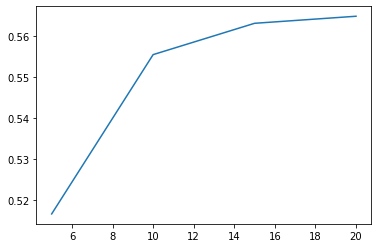

In [18]:
print('scores', scores)
print('ks', ks)
plt.plot(ks, scores)

In [19]:
ols = LinearRegression()
sfs = SequentialFeatureSelector(ols, direction='forward', n_features_to_select=16, cv=10)
sfs.fit(train_X_removed_low_var, train_Y)

retained_features = features_removed_low_var[sfs.get_support() == True]
print('LASSO retained features', retained_features)

LASSO retained features Index(['BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'OpenPorchSF',
       'ScreenPorch', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2',
       'LotConfig_CulDSac', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_RRAe',
       'CentralAir_Y', 'SaleCondition_Partial'],
      dtype='object')


k: 5
OLS Model Accuracy: 0.5166851033488691
k: 10
OLS Model Accuracy: 0.5553979033604741
k: 15
OLS Model Accuracy: 0.5637763109258505
k: 20
OLS Model Accuracy: 0.5647267952390185
scores [0.5166851033488691, 0.5553979033604741, 0.5637763109258505, 0.5647267952390185]
ks [5, 10, 15, 20]


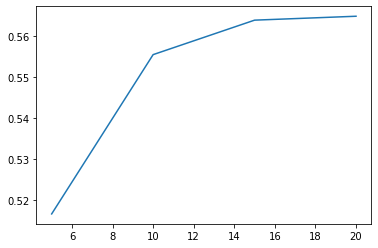

In [20]:

# Backward stepwise (linear) regression with 10-fold cross validation
best_score = 0
best_k = 0

ks = [k for k in range (5, 24, 5)]
scores = []

for k in ks:
    ols = LinearRegression()
    sfs = SequentialFeatureSelector(ols, direction='backward', n_features_to_select=k, cv=10)
    sfs.fit(train_X_removed_low_var, train_Y)
    
    train_X_selected = sfs.transform(train_X_removed_low_var)
    test_X_selected = sfs.transform(test_X_removed_low_var)
    
    ols.fit(train_X_selected, train_Y)
    pred_Y = ols.predict(test_X_selected)
    score = ols.score(test_X_selected, test_Y)
    print('k:', k)
    print('OLS Model Accuracy:', score)
    scores.append(score)
    
    if score > best_score:
        best_score = score
        best_k = k
        
print('scores', scores)
print('ks', ks)
plt.plot(ks, scores)

In [21]:
# Adding all the quadratic features - Ridge
poly_reg = PolynomialFeatures(degree=2)

train_X_trans_poly = poly_reg.fit_transform(train_X_trans)
test_X_trans_poly = poly_reg.transform(test_X_trans)

rcv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]).fit(train_X_trans_poly, train_Y)
pred_Y = rcv.predict(test_X_trans_poly)
# print(pred_Y)
# print(test_Y.values)
print('Best alpha:', rcv.alpha_)
print('MSE:', mean_squared_error(test_Y.values, pred_Y))
print('R:', r2_score(test_Y.values, pred_Y))

Best alpha: 1000.0
MSE: 848164577.8588246
R square: 0.8596563830916287


In [22]:
# Adding all the quadratic features - Lasso

lcv = LassoCV(cv=10, random_state=0).fit(train_X_trans_poly, train_Y.values)
lcv.fit(train_X_trans_poly, train_Y.values.ravel())
pred_Y = lcv.predict(test_X_trans_poly)

print('Best alpha:', lcv.alpha_)
print('MSE:', mean_squared_error(test_Y.values.ravel(), pred_Y))
print('R:', r2_score(test_Y.values.ravel(), pred_Y))



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [28]:
scaler = preprocessing.StandardScaler()
traintt_Y=train.iloc[:, -1:]
traintt_X=houses_train.drop(['Id','SalePrice'],axis=1)
scaler.fit(traintt_X)
traintt_X_trans = pd.DataFrame(scaler.transform(traintt_X))

testtt_X=houses_test.drop(['Id'],axis=1)

#print(testtt_X)
scaler.fit(testtt_X)
testtt_X_trans = pd.DataFrame(scaler.transform(testtt_X))
testtt_X_trans=testtt_X_trans.fillna(0)
print(testtt_X_trans)
print(traintt_X_trans)



lcv = LassoCV(cv=10, random_state=0).fit(traintt_X_trans, traintt_Y)
predtt_Y = lcv.predict(testtt_X_trans)
print(predtt_Y)


# rcv = RidgeCV(alphas=[1e-3,1e-1, 1, 10, 100]).fit(traintt_X_trans, traintt_Y)
# predtt_Y = rcv.predict(testtt_X_trans)
# print(predtt_Y)
def write_to_csv(filename):
  # key is the column name
  df = pd.DataFrame({'Id':test['Id'],'SalePrice': predtt_Y.ravel()})
  
  # index: if show row name, default=True
  df.to_csv(filename, index=False, sep=',')

write_to_csv('submission.csv')



           0         1         2         3         4         5         6    \
0    -0.874711  0.363929 -0.751101  0.400766 -0.340945 -1.072885  0.063273   
1    -0.874711  0.897861 -0.054877  0.400766 -0.439695 -1.214908  1.063027   
2     0.061351  0.809646 -0.751101 -0.497418  0.844059  0.678742  0.772989   
3     0.061351  0.032064 -0.054877  0.400766  0.876976  0.678742  0.357706   
4     1.465443 -0.971808  1.337571 -0.497418  0.679475  0.394694 -0.387166   
...        ...       ...       ...       ...       ...       ...       ...   
1454  2.401505 -1.591330 -1.447325  1.298950 -0.044694 -0.646813 -0.965046   
1455  2.401505 -1.599808 -1.447325 -0.497418 -0.044694 -0.646813 -0.411336   
1456 -0.874711  2.055150 -0.751101  1.298950 -0.373861  0.584059  1.724403   
1457  0.646389  0.125527 -0.751101 -0.497418  0.679475  0.394694 -0.224568   
1458  0.061351 -0.038790  0.641347 -0.497418  0.712392  0.489377  0.700479   

           7         8         9    ...       119       120    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X has 129 features, but LassoCV is expecting 130 features as input.